## Kurnia Anwar Ra'if - Data Scientist
github : https://github.com/anwarraif/Simple-TelchoChurn-Classification
linkedin : https://www.linkedin.com/in/anwaraif/

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges column is seen as object type, but includes numeric type values. Convert this column to numeric.

In [5]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 




There are 11 missing values in TotalCharges column. We can fill the missing values with median data, set it to 0 or delete these rows, it is up to you. I prefer deleting these columns because it is a small part compared to all data.

We don't need customerID column for analyzing, so we can drop this column.

In [6]:
#delete rows including null values
data.dropna(inplace = True)

In [7]:
data.drop(["customerID"],axis=1,inplace = True)

In [8]:
data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Replace text columns to integers. The columns below includes similar text values so I changed them once.

In [9]:
data.gender = [1 if each == "Male" else 0 for each in data.gender]

columns_to_convert = [ 'Partner','Dependents',                    
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data[item]]
    
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


### EDA

Let's look at the distribution of Churn values. As you can see below, the data set is imbalanced. But for now, I will ignore this.


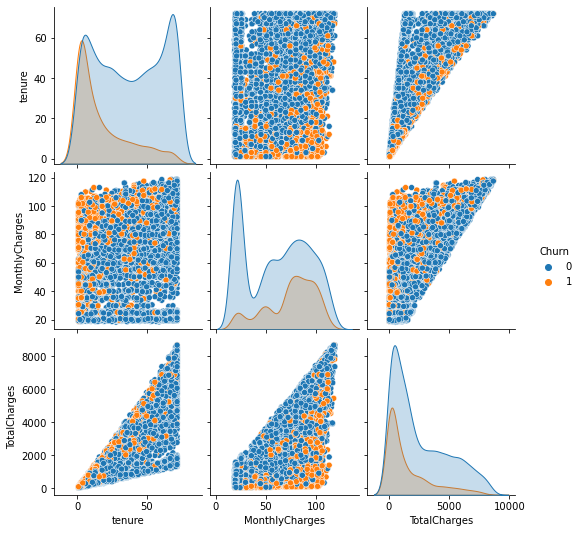

In [10]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

People having lower tenure and higher monthly charges are tend to churn more. Also as you can see below; having month-to-month contract and fiber obtic internet have a really huge effect on churn probability.

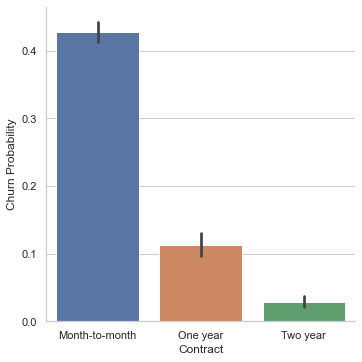

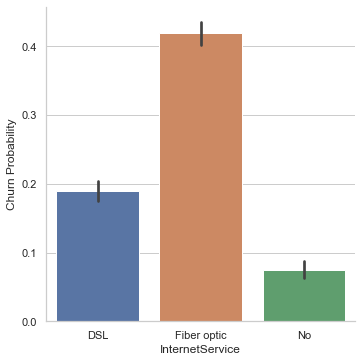

In [11]:
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=data,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=data,kind="bar")
g2.set_ylabels("Churn Probability")

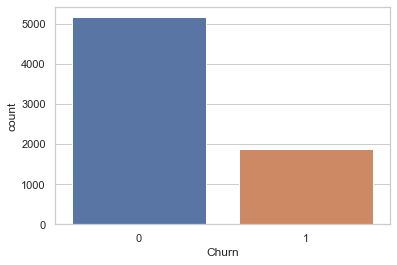

In [12]:
sns.countplot(x="Churn",data=data);



Convert remaining text based columns to dummy columns using pandas get_dummies function. This function creates new columns named as values of the related columns.

Now our data set only have integer and numerical columns so that we can apply statistical models.


### Copy Data

In [13]:
data_telco = data.copy()

X_train, X_test, y_train, y_test 

sebelum melakukan feature engineering dan feature selection maka concat dlu untuk
X_train dengan y_train -> df_train
X_test dengan y_test -> df_test
1. Baru df_train dan df_test dilakukan masing2 remove outlier alhasil baris yang terbuang dari x_train(17) y_train(20) lalu x_test(8) y_test(10) memiliki index yang sama
2. 

### Get Dummies

In [14]:
#data = pd.get_dummies(data=data)
#data.head()

### Frequency Encoding : Feature Engineering


In [15]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,-1,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [16]:
df = data.copy()

### Dependents

In [17]:
freq_et = df['Dependents'].value_counts().reset_index()
freq_et

,index,Dependents
0,0,4933
1,1,2099


In [18]:
freq_et.rename(columns={"index": "Dependents", "Dependents": "freq_Dependents"}, inplace = True)

In [19]:
freq_et

,Dependents,freq_Dependents
0,0,4933
1,1,2099


In [20]:
freq_et['percentage_Dependents'] = round((freq_et['freq_Dependents']/freq_et['freq_Dependents'].sum())*100,2)
freq_et

,Dependents,freq_Dependents,percentage_Dependents
0,0,4933,70.15
1,1,2099,29.85


In [21]:
df = df.merge(freq_et[['Dependents','percentage_Dependents']], on='Dependents', how='inner')

In [22]:
df[['Dependents','percentage_Dependents']]

,Dependents,percentage_Dependents
0,0,70.15
1,0,70.15
2,0,70.15
3,0,70.15
4,0,70.15
...,...,...
7027,1,29.85
7028,1,29.85
7029,1,29.85
7030,1,29.85


In [23]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,70.15
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,70.15
3,1,0,0,0,45,0,-1,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,70.15
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,70.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Mailed check,70.65,70.65,1,29.85
7028,1,0,1,1,12,1,0,No,-1,-1,...,-1,-1,-1,Month-to-month,1,Electronic check,19.20,239.00,0,29.85
7029,1,0,1,1,24,1,1,DSL,1,0,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,29.85
7030,0,0,1,1,72,1,1,Fiber optic,0,1,...,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,29.85


### Partner

In [24]:
freq_et = df['Partner'].value_counts().reset_index()

In [25]:
freq_et

,index,Partner
0,0,3639
1,1,3393


In [26]:
freq_et.rename(columns={"index": "Partner", "InternetService": "freq_Partner"}, inplace = True)

In [27]:
freq_et

,Partner,Partner
0,0,3639
1,1,3393


In [28]:
freq_et = df['Partner'].value_counts().reset_index()
freq_et.rename(columns={"index": "Partner", "Partner": "freq_Partner"}, inplace = True)
freq_et['percentage_Partner'] = round((freq_et['freq_Partner']/freq_et['freq_Partner'].sum())*100,2)
freq_et

,Partner,freq_Partner,percentage_Partner
0,0,3639,51.75
1,1,3393,48.25


In [29]:
df = df.merge(freq_et[['Partner','percentage_Partner']], on='Partner', how='inner')
df[['Partner','percentage_Partner']]

,Partner,percentage_Partner
0,1,48.25
1,1,48.25
2,1,48.25
3,1,48.25
4,1,48.25
...,...,...
7027,0,51.75
7028,0,51.75
7029,0,51.75
7030,0,51.75


In [30]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25
1,0,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,70.15,48.25
2,1,0,1,0,58,1,1,Fiber optic,0,0,...,1,1,One year,0,Credit card (automatic),100.35,5681.10,0,70.15,48.25
3,1,0,1,0,12,1,0,No,-1,-1,...,-1,-1,One year,0,Bank transfer (automatic),19.80,202.25,0,70.15,48.25
4,0,0,1,0,58,1,1,DSL,0,1,...,0,0,Two year,1,Credit card (automatic),59.90,3505.10,0,70.15,48.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,48,0,-1,DSL,0,1,...,0,1,Month-to-month,0,Credit card (automatic),45.55,2108.35,0,29.85,51.75
7028,1,0,0,1,50,0,-1,DSL,1,1,...,1,0,One year,1,Bank transfer (automatic),43.05,2208.05,0,29.85,51.75
7029,1,0,0,1,1,0,-1,DSL,0,0,...,0,0,Month-to-month,0,Mailed check,24.20,24.20,0,29.85,51.75
7030,1,0,0,1,31,0,-1,DSL,0,0,...,0,0,Month-to-month,0,Credit card (automatic),25.00,789.20,0,29.85,51.75


### Internet Service

In [31]:
freq_et = df['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_Internet_service"}, inplace = True)
freq_et['percentage_internet_service'] = round((freq_et['freq_Internet_service']/freq_et['freq_Internet_service'].sum())*100,2)
freq_et

,InternetService,freq_Internet_service,percentage_internet_service
0,Fiber optic,3096,44.03
1,DSL,2416,34.36
2,No,1520,21.62


In [32]:
df = df.merge(freq_et[['InternetService','percentage_internet_service']], on='InternetService', how='inner')
df[['InternetService','percentage_internet_service']]

,InternetService,percentage_internet_service
0,DSL,34.36
1,DSL,34.36
2,DSL,34.36
3,DSL,34.36
4,DSL,34.36
...,...,...
7027,No,21.62
7028,No,21.62
7029,No,21.62
7030,No,21.62


In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36
1,0,0,1,0,58,1,1,DSL,0,1,...,0,Two year,1,Credit card (automatic),59.90,3505.10,0,70.15,48.25,34.36
2,1,0,1,0,72,1,1,DSL,1,1,...,1,Two year,1,Credit card (automatic),90.25,6369.45,0,70.15,48.25,34.36
3,0,0,1,0,13,1,1,DSL,1,1,...,0,Month-to-month,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36
4,0,1,1,0,25,1,1,DSL,1,0,...,0,Month-to-month,1,Credit card (automatic),69.50,1752.65,0,70.15,48.25,34.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,25,1,0,No,-1,-1,...,-1,Month-to-month,0,Mailed check,20.80,460.20,0,29.85,51.75,21.62
7028,1,0,0,1,1,1,0,No,-1,-1,...,-1,Month-to-month,1,Mailed check,19.30,19.30,0,29.85,51.75,21.62
7029,1,0,0,1,44,1,0,No,-1,-1,...,-1,Two year,0,Bank transfer (automatic),19.55,819.95,0,29.85,51.75,21.62
7030,1,0,0,1,27,1,0,No,-1,-1,...,-1,Two year,0,Credit card (automatic),19.70,509.30,0,29.85,51.75,21.62


### Contract

In [34]:
freq_et = df['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et['percentage_Contract'] = round((freq_et['freq_Contract']/freq_et['freq_Contract'].sum())*100,2)
freq_et

,Contract,freq_Contract,percentage_Contract
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


In [35]:
df = df.merge(freq_et[['Contract','percentage_Contract']], on='Contract', how='inner')
df[['Contract','percentage_Contract']]

,Contract,percentage_Contract
0,Month-to-month,55.11
1,Month-to-month,55.11
2,Month-to-month,55.11
3,Month-to-month,55.11
4,Month-to-month,55.11
...,...,...
7027,One year,20.93
7028,One year,20.93
7029,One year,20.93
7030,One year,20.93


In [36]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract
0,0,0,1,0,1,0,-1,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11
1,0,0,1,0,13,1,1,DSL,1,1,...,Month-to-month,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36,55.11
2,0,1,1,0,25,1,1,DSL,1,0,...,Month-to-month,1,Credit card (automatic),69.50,1752.65,0,70.15,48.25,34.36,55.11
3,1,0,1,0,29,0,-1,DSL,0,0,...,Month-to-month,0,Mailed check,33.75,1009.25,0,70.15,48.25,34.36,55.11
4,1,1,1,0,58,0,-1,DSL,0,1,...,Month-to-month,1,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,39,1,1,No,-1,-1,...,One year,0,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93
7028,1,0,0,1,30,1,1,No,-1,-1,...,One year,0,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93
7029,1,0,0,1,52,1,0,No,-1,-1,...,One year,0,Credit card (automatic),19.65,928.40,0,29.85,51.75,21.62,20.93
7030,0,0,0,1,2,1,0,No,-1,-1,...,One year,0,Bank transfer (automatic),20.50,38.25,0,29.85,51.75,21.62,20.93


### Payment Method

In [37]:
freq_et = df['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['percentage_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et

,PaymentMethod,freq_PaymentMethod,percentage_PaymentMethod
0,Electronic check,2365,33.63
1,Mailed check,1604,22.81
2,Bank transfer (automatic),1542,21.93
3,Credit card (automatic),1521,21.63


In [38]:
df = df.merge(freq_et[['PaymentMethod','percentage_PaymentMethod']], on='PaymentMethod', how='inner')
df[['PaymentMethod','percentage_PaymentMethod']]

,PaymentMethod,percentage_PaymentMethod
0,Electronic check,33.63
1,Electronic check,33.63
2,Electronic check,33.63
3,Electronic check,33.63
4,Electronic check,33.63
...,...,...
7027,Bank transfer (automatic),21.93
7028,Bank transfer (automatic),21.93
7029,Bank transfer (automatic),21.93
7030,Bank transfer (automatic),21.93


In [39]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod
0,0,0,1,0,1,0,-1,DSL,0,1,...,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63
1,0,0,1,0,13,1,1,DSL,1,1,...,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36,55.11,33.63
2,1,1,1,0,58,0,-1,DSL,0,1,...,1,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63
3,0,0,1,0,1,0,-1,DSL,0,0,...,1,Electronic check,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63
4,1,1,1,0,1,0,-1,DSL,0,1,...,0,Electronic check,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,37,1,0,No,-1,-1,...,0,Bank transfer (automatic),20.30,755.40,0,29.85,51.75,21.62,20.93,21.93
7028,1,0,0,1,10,1,0,No,-1,-1,...,1,Bank transfer (automatic),19.95,219.50,0,29.85,51.75,21.62,20.93,21.93
7029,1,0,0,1,39,1,1,No,-1,-1,...,0,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93,21.93
7030,1,0,0,1,30,1,1,No,-1,-1,...,0,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93,21.93


In [40]:
#drop column yg dilakukan encoding
df = df.drop(['Contract', 'PaymentMethod','InternetService','Partner'], axis=1)

In [41]:
data = df.copy()

### Kalau hasil recal dan precision masih jelek setelah diubah ke frequency encoding, maka dari data dilakukan oversampling baru cek evaluasi recal dan precision lagi.

In [42]:
data

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod
0,0,0,0,1,0,-1,0,1,0,0,...,0,1,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63
1,0,0,0,13,1,1,1,1,0,1,...,0,1,76.20,981.45,0,70.15,48.25,34.36,55.11,33.63
2,1,1,0,58,0,-1,0,1,1,0,...,1,1,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63
3,0,0,0,1,0,-1,0,0,0,0,...,0,1,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63
4,1,1,0,1,0,-1,0,1,0,0,...,0,0,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,37,1,0,-1,-1,-1,-1,...,-1,0,20.30,755.40,0,29.85,51.75,21.62,20.93,21.93
7028,1,0,1,10,1,0,-1,-1,-1,-1,...,-1,1,19.95,219.50,0,29.85,51.75,21.62,20.93,21.93
7029,1,0,1,39,1,1,-1,-1,-1,-1,...,-1,0,25.45,958.45,0,29.85,51.75,21.62,20.93,21.93
7030,1,0,1,30,1,1,-1,-1,-1,-1,...,-1,0,25.35,723.30,0,29.85,51.75,21.62,20.93,21.93


In [74]:
data.dtypes

gender                           int64
SeniorCitizen                    int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                    int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
PaperlessBilling                 int64
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
percentage_Dependents          float64
percentage_Partner             float64
percentage_internet_service    float64
percentage_Contract            float64
percentage_PaymentMethod       float64
dtype: object

In [43]:
X = data.drop(['Churn'],axis=1)

In [44]:
y = data.Churn.values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
from imblearn import under_sampling, over_sampling

#X = df_numeric.drop(['survived'],axis=1)
#y = df_numeric['survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x_train, y_train)

# Overampling
X_over, y_over = over_sampling.RandomOverSampler().fit_resample(x_train, y_train)

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(x_train, y_train)



Let's see the correlation between churn and the remaining columns. Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.




### Prepare x and y

First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. Also, apply normalization to x in order to scale all values between 0 and 1.


In [47]:
#assign Class_att column as y attribute
y = data.Churn.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values



### Splitting Data

Split the data set as train and test with 20:80 ratio.


### Undersampling

In [48]:
#Split data into Train and Test 
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2,random_state =1)


### Apply Machine Learning Algorithms

Let's start to apply some machine learning algorithms and find the accuracy of each.

#### 1. KNN Classification




We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. So that we can find the optimal K value.


In [49]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7018716577540107


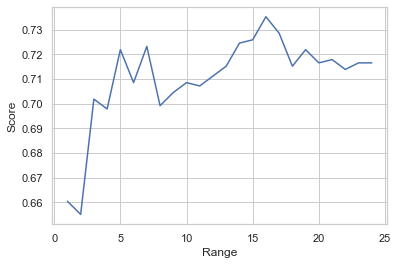

In [50]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 1, then we get maximum score of 86%

In [51]:
knn_model = KNeighborsClassifier(n_neighbors = 16) #set K neighbor above
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=11 is :",accuracy_knn)

KNN accuracy according to K=11 is : 0.660427807486631


##### KNN accuracy according to K=11 is : 0.7874911158493249

#### 2. SVM(Support Vector Machine) Classification

In [52]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.606951871657754


#### 3. Logistic Regression Classification

In [53]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7540106951871658


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4. Decision Tree Classification

In [54]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.6844919786096256


#### 5. Random Forest Classification


In [55]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.7446524064171123




I set tree number as 5 initially. But I want to find the appropriate tree number. Let's try to find the best number with trying 1 to 50.


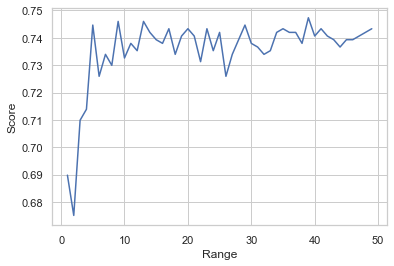

In [56]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()



As you can see, the highest accuracy is at n_estimators = 45.


In [57]:
rf_model = RandomForestClassifier(n_estimators = 45, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 33 trees is :",accuracy_rf)

Random Forest accuracy for 33 trees is : 0.7393048128342246


#### 6.Naive Bayes Classification

In [58]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7473262032085561




Logistic regression and SVC classificagtion algorithms have the highest accuracy. But as I mentioned before, our *data is imbalanced*. So it is important to look at the confusion matrix according to these two algorithms. With imbalanced datasets, the highest accuracy does not give the best model. Assume we have 1000 total rows, 10 rows are churn and 990 rows are non-churn. If we find all these 10 churn rows as non-churn, then the accuracy will be still %99. Althogh it is a wrong model, if we do not look at the confusion matrix, then we can not see the mistake.

Confusion matrix gives us FN(false negative), FP(false positive), TN(true negative) and TP(true positive) values.
missing

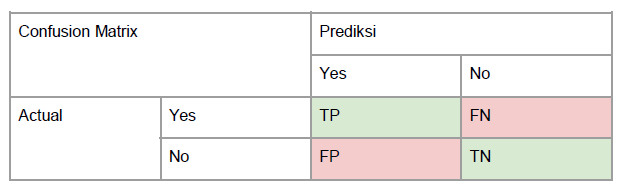


### Model Evaluation

In [59]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

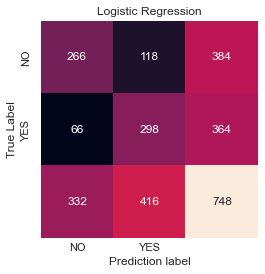

In [60]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

TN = 927
FP = 114
FN = 169
TP = 197
This means; there are total 927+114 = 1041 actual non-churn values and the algorithm predict 927 of them as non-churn and 114 of them churn. Also there are total 169 + 197 = 366 actual churn values and the algorithm predict 169 of them as non-churn and 197 of them as churn.

Acuuracy should not be used as solely metric for imbalance datasets. There are some other metrics named as recall and precision.
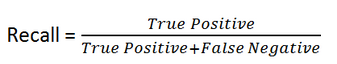

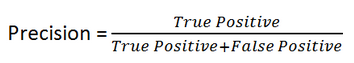

Sometimes we get high recall and low precision or vice versa. There is another metric that combines both precision and recall like below. We will use F1 score to identify the best algorithm score.

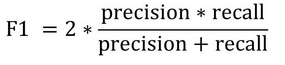

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


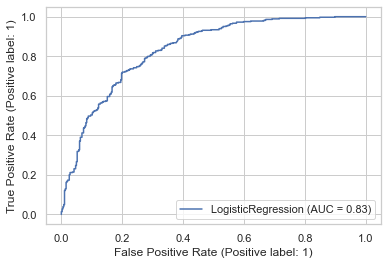

In [61]:
plot_roc_curve(lr_model,x_test,y_test)
plt.show()

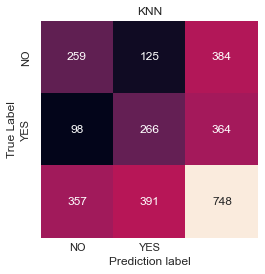

In [62]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


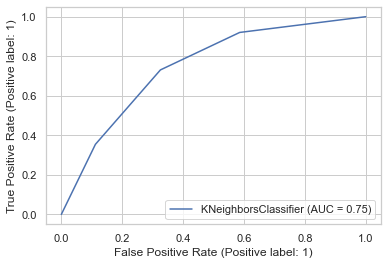

In [63]:
plot_roc_curve(knn,x_test,y_test)
plt.show()

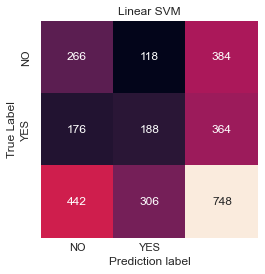

In [64]:
model_evaluation(svc_model.predict(x_test),"Linear SVM")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


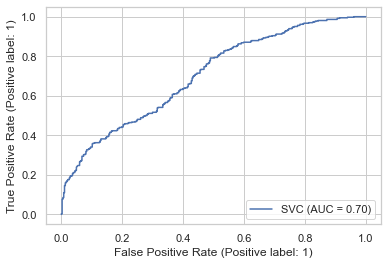

In [65]:
plot_roc_curve(svc_model,x_test,y_test)
plt.show()

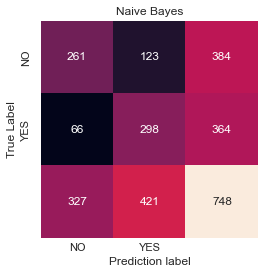

In [66]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


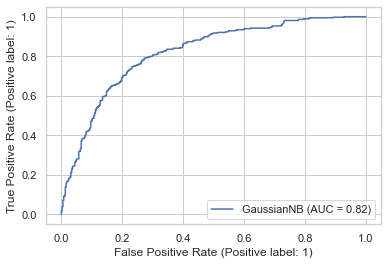

In [67]:
plot_roc_curve(nb_model,x_test,y_test)
plt.show()

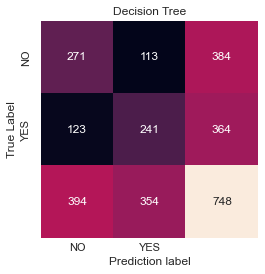

In [68]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


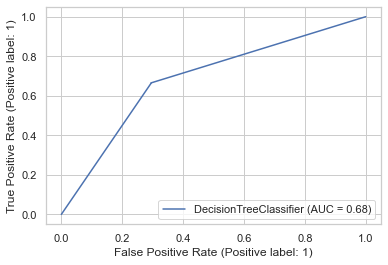

In [69]:
plot_roc_curve(dt_model,x_test,y_test)
plt.show()

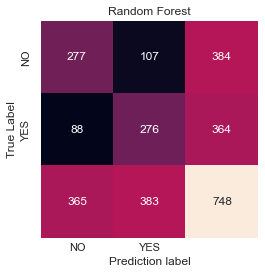

In [70]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


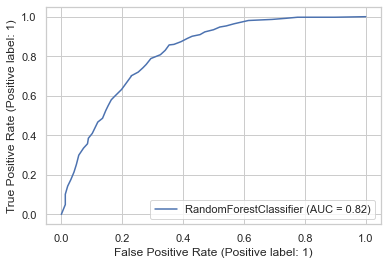

In [71]:
plot_roc_curve(rf_model,x_test,y_test)
plt.show()

In [72]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [73]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========SVC=========;",y_test, svc_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.7540106951871658
precision:  0.7163461538461539
recall:  0.8186813186813187
f1_score:  0.7532777661597905
=========SVC=========;
accuracy:  0.606951871657754
precision:  0.6143790849673203
recall:  0.5164835164835165
f1_score:  0.603738851288739
=========Naive Bayes=========;
accuracy:  0.7473262032085561
precision:  0.7078384798099763
recall:  0.8186813186813187
f1_score:  0.746371435925671
=========Decision Tree=========;
accuracy:  0.6844919786096256
precision:  0.6807909604519774
recall:  0.6620879120879121
f1_score:  0.6843225340542392
=========Random Forest=========;
accuracy:  0.7393048128342246
precision:  0.720626631853786
recall:  0.7582417582417582
f1_score:  0.7393136657064275
=========KNN=========;
accuracy:  0.7018716577540107
precision:  0.680306905370844
recall:  0.7307692307692307
f1_score:  0.7017709414199275


### Poin-poin Evaluasi :
1. Coba lakukan oversampling lalu cek evaluasi machine learningnya (akurasi -> total datanya harus balance, (presisi, recal) -> churn)
2. Coba lakukan undersampling lalu cek evaluasi machine learningnya (akurasi -> total datanya harus balance, (presisi, recal) -> churn)
3. Bila hasilnya masih jelek, maka cek ke bagian feature selection (korelasi atau VIF), Feature Engineering (Frequency Encoding)


Karena diawal proses tidak dilakukan over/under maka cek nya itu ke AUC, recal, presisi.

CONCLUSION

    1. Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
    2. Logistic Regression gives the highest F1 Score, so it is the best model.
    3. Naive Bayes is the worst model because it gives the lowest F1 score.
    4. People having month-to-month contract tend to churn more than people having long term conracts.
    5. As the tenure increases, the probability of churn decreases.
    6. As tmonthly charges increases, the probability of churn increases.


Akurasi : Evaluasi ketika memiliki balanced data

Precision :Biasa digunakan ketika lebih memperhatikan jumlah False positif (FP) yang sebaiknya lebih sedikit.Contoh kasus : deteksi spam pada email

Recall :Jika kita tidak memperbolehkan nilai False Negatif (FN) yang besar
Contoh kasus : Deteksi penyakit kanker

F1 score merangkum precision dan  recall dengan mengambil RATAAN HARMONIK dari keduanya
F1 score dapat diterapkan pada data imbalance

AUC mirip akurasi tapi dapat dapat diterapkan pada data imbalance
